In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
import json
import awkward as ak
import pathlib
data = ak.from_json(pathlib.Path("outputNewData50NOBIB.json"))

In [3]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label=""):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

    # a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

In [4]:
colors = []
def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
            
        ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

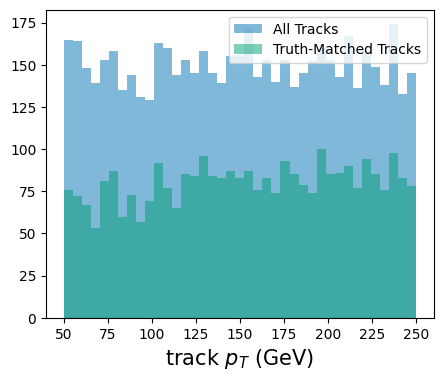

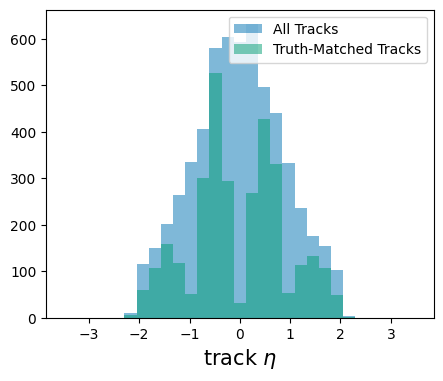

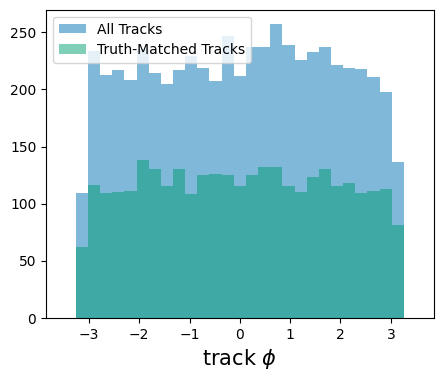

In [5]:

arrays = [data["mcp_mu_pt"],data["mcp_mu_match_pt"]]

legend = [ "All Tracks","Truth-Matched Tracks"]
compare1DHistograms(arrays, bins=np.linspace(50,250,40), leg=legend, label=";track $p_{T}$ (GeV)")

arrays = [data["mcp_mu_eta"],data["mcp_mu_match_eta"]]
legend = [ "All Tracks","Truth-Matched Tracks"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";track $\eta$")


arrays = [data["mcp_mu_phi"],data["mcp_mu_match_phi"]]
legend = [ "All Tracks","Truth-Matched Tracks"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";track $\phi$")


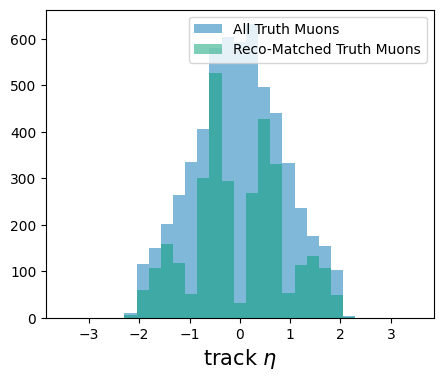

In [6]:



arrays = [data["mcp_mu_eta"],data["mcp_mu_match_eta"]]
legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";track $\eta$")


In [24]:
def plotFakeRate(data1, data2,bins, zoom = False, scale='linear',label=""):
        fig = plt.figure(figsize=(5,4))
        ax = fig.add_subplot(111)
        cleanData = ak.to_list(ak.flatten(data1, axis=None))
        matchedData = ak.to_list(ak.flatten(data2, axis=None))

        mD =  np.histogram(matchedData, bins)
        yMatched = mD[0]

        cD = np.histogram(cleanData, bins)
        xClean = cD[1]
        yClean = cD[0]
        xClean = xClean[:len(xClean)-1]
        t = yClean-yMatched
        k = t/yClean
        """
        print(yClean)
        print("-")
        print(yMatched)
        print("=")
        print(t)
        print(yClean)
        print(k)
        """
        



        wid = (max(bins)-min(bins))/len(bins)
        error = np.sqrt(k)/np.sqrt(50)
        ax.errorbar(xClean, k,error, marker='o',markersize='3', linestyle='')
        
       

      


        
        #ax.hist(data, bins, weights=np.ones(len(data)) / len(d3))

        
        # handle labels
        title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
        xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
        ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
        
        ax.set_title(title)
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        plt.yscale(scale)
        plt.show()

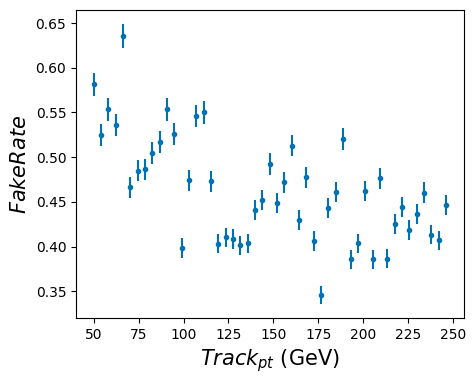

In [8]:
plotFakeRate(data["mcp_mu_pt"],data["mcp_mu_match_pt"],bins=np.linspace(50,250,50),label=";$Track_{pt}$ (GeV);$Fake Rate$")

/var/folders/2j/_zfm4bxj0cl90wmtwhzby29h0000gn/T/ipykernel_24994/1671134253.py:15: RuntimeWarning: invalid value encountered in divide
  k = t/yClean


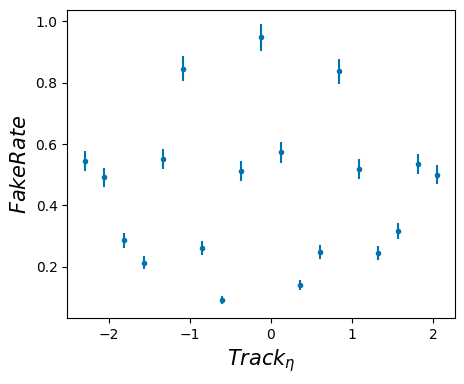

In [15]:
plotFakeRate(data["mcp_mu_eta"],data["mcp_mu_match_eta"],bins=np.linspace(-3.5,3.5,30),label=";$Track_{\eta}$;$Fake Rate$")

/var/folders/2j/_zfm4bxj0cl90wmtwhzby29h0000gn/T/ipykernel_24994/1029825131.py:15: RuntimeWarning: invalid value encountered in divide
  k = t/yClean


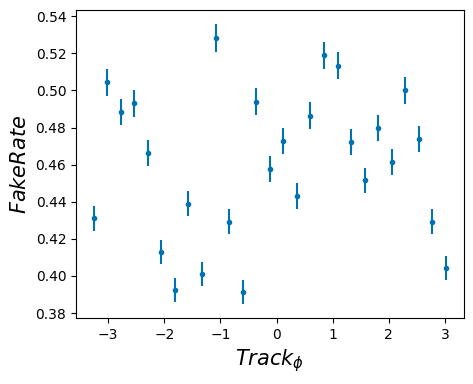

In [25]:
plotFakeRate(data["mcp_mu_phi"],data["mcp_mu_match_phi"],bins=np.linspace(-3.5,3.5,30),label=";$Track_{\phi}$;$Fake Rate$")